<a href="https://colab.research.google.com/github/ReshmaAjil/Amazon-review-sentiment-analysis/blob/main/LogisticRegressionPurchase_possibity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pandas as pd
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akram24/social-network-ads")

print("Path to dataset files:", path)

import os
print(os.listdir("/kaggle/input/social-network-ads"))

# Step 1: Load the dataset
df = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

Using Colab cache for faster access to the 'social-network-ads' dataset.
Path to dataset files: /kaggle/input/social-network-ads
['Social_Network_Ads.csv']


In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
df.head()
from sklearn.preprocessing import LabelEncoder
#df=df.drop("User ID",axis=1)
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
# split Features and Target variable
X=df.drop("Purchased",axis=1)
y=df["Purchased"]
df.isnull().sum()
df.info()
#Train Test spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Model Training
model=LogisticRegression()
model.fit(X_train,y_train)
#Prediction
y_pred=model.predict(X_test)
#Accuracy_test
print("Accuracy Score ",accuracy_score(y_test,y_pred))
print("Classiification Report ",classification_report(y_test,y_pred))
print("Confusion Matrix ",confusion_matrix(y_test,y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB
Accuracy Score  0.8875
Classiification Report                precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

Confusion Matrix  [[50  2]
 [ 7 21]]


In [ ]:
#Prediction Using Decition Tree

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)

model.fit(X_train,y_train)
#Prediction
y_pred=model.predict(X_test)
#Accuracy Score
print("Accuracy Score ",accuracy_score(y_test,y_pred))
print("Classiification Report ",classification_report(y_test,y_pred))
print("Confusion Matrix ",confusion_matrix(y_test,y_pred))

Accuracy Score  0.8875
Classiification Report                precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.88      0.79      0.83        28

    accuracy                           0.89        80
   macro avg       0.89      0.86      0.87        80
weighted avg       0.89      0.89      0.89        80

Confusion Matrix  [[49  3]
 [ 6 22]]


In [ ]:
#Prediction Using Random Forest

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)

model.fit(X_train,y_train)
#Prediction
y_pred=model.predict(X_test)
#Accuracy Score
print("Accuracy Score ",accuracy_score(y_test,y_pred))
print("Classiification Report ",classification_report(y_test,y_pred))
print("Confusion Matrix ",confusion_matrix(y_test,y_pred))

Accuracy Score  0.925
Classiification Report                precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80

Confusion Matrix  [[47  5]
 [ 1 27]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# OPTIONAL: XGBoost (if installed)
try:
    from xgboost import XGBClassifier
    xgb_available = True
except:
    xgb_available = False

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

if xgb_available:
    models["XGBoost"] = XGBClassifier(random_state=42)

# Loop through models
for name, model in models.items():
    print("\n====================================")
    print(f"Model: {name}")
    print("====================================")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.8875

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

Confusion Matrix:
 [[50  2]
 [ 7 21]]

Model: Decision Tree
Accuracy: 0.8875

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.88      0.79      0.83        28

    accuracy                           0.89        80
   macro avg       0.89      0.86      0.87        80
weighted avg       0.89      0.89      0.89        80

Confusion Matrix:
 [[49  3]
 [ 6 22]]

Model: Random Forest
Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.82      0.82      0.82        28

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80

Confusion Matrix:
 [[47  5]
 [ 5 23]]

Model: XGBoost
Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        52
           1       0.79      0.79      0.79        28

    accuracy                           0.85        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.85      0.85      0.85        80

Confusion Matrix:
 [[46  6]
 [ 6 22]]


Text(0.5, 1.0, 'Age Group distibution')

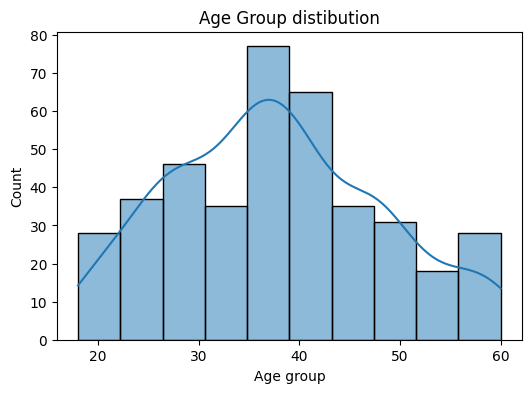

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


#Visualizations
#Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"],kde=True)
plt.xlabel("Age group")
plt.ylabel("Count")
plt.title("Age Group distibution")

Text(0.5, 1.0, 'Gender Distribution')

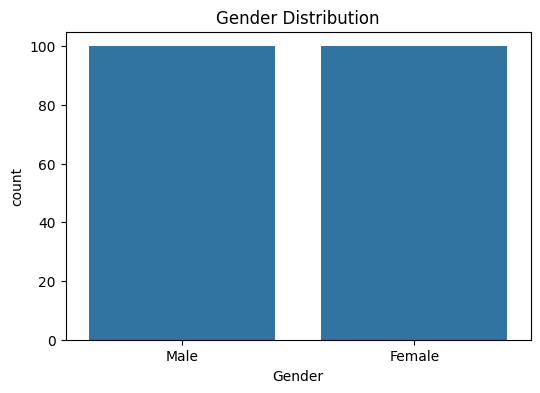

In [ ]:
#Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Gender",data=df)
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Salary distribution')

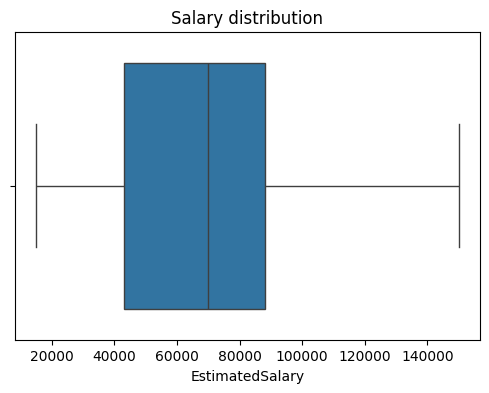

In [ ]:
#Boxplot (Outlier Detection)
df.head()
plt.figure(figsize=(6,4))
sns.boxplot(x=df["EstimatedSalary"])
plt.title("Salary distribution")

Text(0.5, 1.0, 'Age v/s Salary Disrtribution')

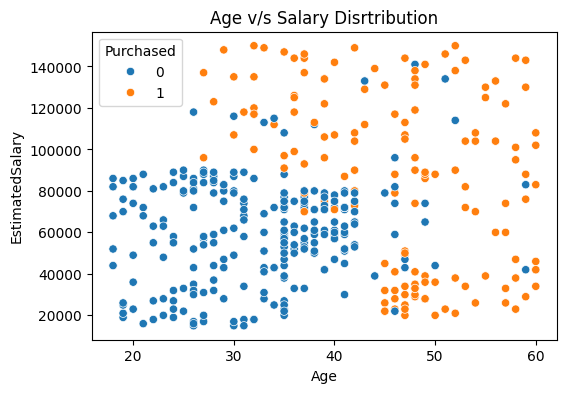

In [ ]:
#Age v/s Salary
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age",y="EstimatedSalary",hue="Purchased",data=df)
plt.title("Age v/s Salary Disrtribution")

Text(0.5, 1.0, 'Correlation Heatmap')

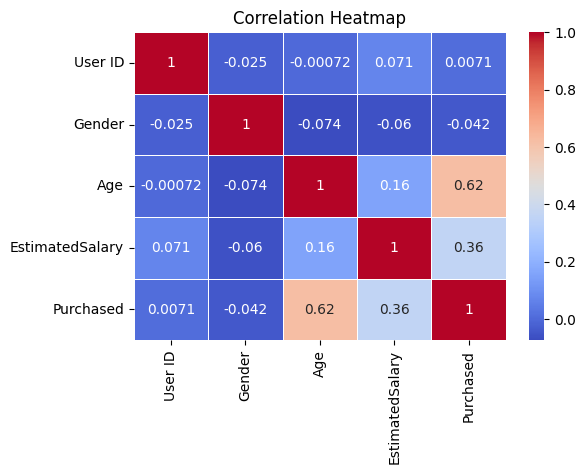

In [ ]:
#Correlation Heatmap
corr=df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title("Correlation Heatmap")


In [ ]:
#Ignore this cell.
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akram24/social-network-ads")

print("Path to dataset files:", path)

import os
print(os.listdir("/kaggle/input/social-network-ads"))

# Step 1: Load the dataset
df = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

Using Colab cache for faster access to the 'social-network-ads' dataset.
Path to dataset files: /kaggle/input/social-network-ads
['Social_Network_Ads.csv']


In [ ]:
#Ignore this cell

df=pd.DataFrame()
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate 200 synthetic rows
n = 200

data = {
    "User ID": np.arange(10001, 10001 + n),

    # 50–50 male/female
    "Gender": np.random.choice(["Male", "Female"], size=n),

    # Ages between 18–60
    "Age": np.random.randint(18, 61, size=n),

    # Salary between 15,000 and 150,000
    "EstimatedSalary": np.random.randint(15000, 150001, size=n)
}

df = pd.DataFrame(data)

# More realistic purchase behavior:
# Older + higher salary = higher probability of buying
purchase_prob = (
    0.01 * (df["Age"] - 18) +
    0.000006 * (df["EstimatedSalary"] - 15000)
)

df["Purchased"] = np.random.binomial(1, purchase_prob.clip(0, 0.95))

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,10001,Male,49,51631,1
1,10002,Female,56,87991,0
2,10003,Male,49,19014,0
3,10004,Male,21,26093,0
4,10005,Male,47,33070,0
